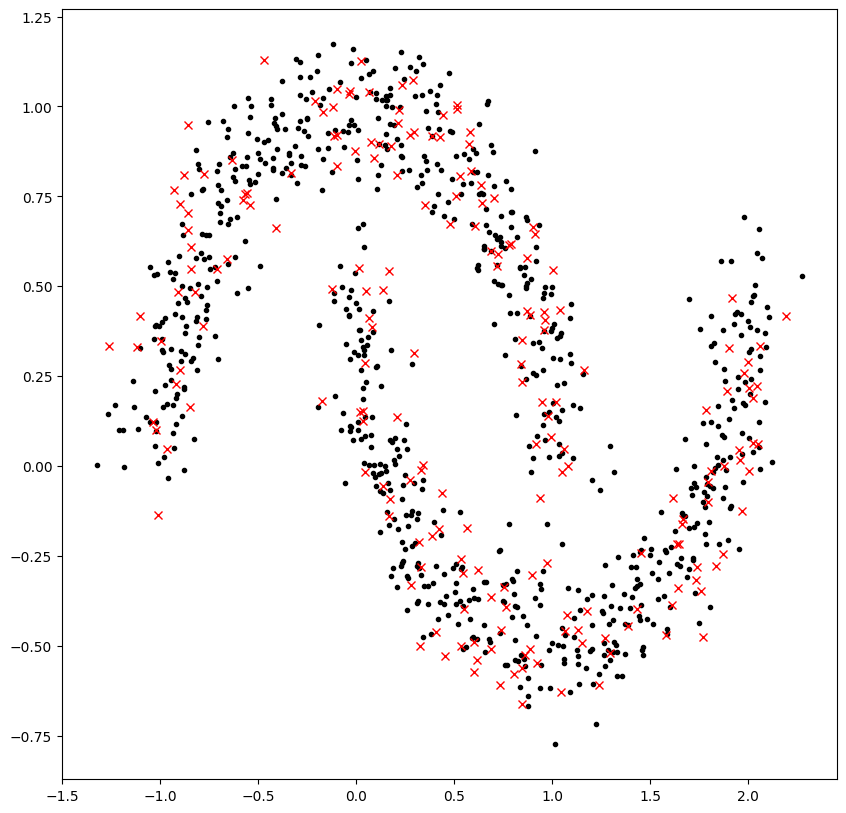

In [46]:
import torch
from random import Random
rand = Random(5)
def generate_point (N=1000):
    return ([rand.uniform(0, 1) for xi in range(N)],
            [rand.uniform(0, 1) for yi in range(N) ])

datax ,datay = generate_point() 

data_torch = torch.tensor([datax,datay])
data_torch = data_torch.t()
pnt = torch.tensor([5,5])
res = data_torch -pnt
res= res**2
res= torch.sqrt(res)
res=res.sum(dim=0)/data_torch.shape[0]

torch_loss_fun = lambda pnt, data : torch.sqrt(((pnt-data)**2).sum(dim=1)).sum(dim= 0)/data.shape[0]
from sklearn.datasets import make_moons
from math import floor
train_per = 0.8
N = 1000
Noise = 0.1
x,y = make_moons(N,shuffle= True,noise=(Noise),random_state=(5))
x_train ,y_train= x[:floor(train_per * N),:] , y[:floor(train_per * N)] 
x_valid , y_valid = x[floor(train_per * N):,:] , y[floor(train_per * N): ]
x_train , y_train = torch.Tensor(x_train), torch.Tensor(y_train).long()
x_valid , y_valid = torch.Tensor(x_valid), torch.Tensor(y_valid).long()



from matplotlib.pyplot import figure 
fig = figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.plot(x_train[:,0],x_train[:,1],"k.")
ax.plot(x_valid[:,0],x_valid[:,1],"rx")

y_train = torch.nn.functional.one_hot(y_train, num_classes=2)
y_valid = torch.nn.functional.one_hot( y_valid , num_classes = 2)

torch.manual_seed(5)
w =torch.randn(size=(2,2))
w.to(torch.float64)
w.requires_grad = True
w.retain_grad()

b =torch.randn(size=(1,2))
b.to(torch.float64)
b.requires_grad = True
b.retain_grad()

def predict(x):
  a = x @ w.t() + b
  return torch.softmax(a, dim = 1)
# def predict(x):
#   a = x @ w.t() + b
#   return torch.tanh(a)

In [47]:

##$$losss$$##
    

In [48]:
def loss_fun(x,y):
  y_hat=predict(x)
  return torch.mean(-(y*torch.log(y_hat)).sum(dim=1))
 ## mean squared error instead of cross intropy 
# def loss_fun(x,y):
#   y_hat = predict(x)
#   return torch.mean((y - y_hat)**2)   

In [49]:
epochs=1000
delta=0.1
train_loss,valid_loss=[],[]
for _ in range(epochs):
  current_train_loss=loss_fun(x_train,y_train)
  current_train_loss.backward()
  train_loss.append(current_train_loss.data)
  with torch.no_grad():
    current_valid_loss=loss_fun(x_valid,y_valid)
    valid_loss.append(current_valid_loss.data)
    
    w -= delta*w.grad.data
    b -= 0.000001*b.grad.data
    w.grad.zero_()#underscore means inplace
    b.grad.zero_()
    ##sgd
# epochs = 1000
# delta = 0.1
# batch_size = 32 # choose a suitable batch size
# train_loss, valid_loss = [], []

# for epoch in range(epochs):
#   for i in range(0, len(x_train), batch_size):
#     # sample a mini-batch
#     x_batch = x_train[i:i+batch_size]
#     y_batch = y_train[i:i+batch_size]
    
#     current_train_loss = loss_fun(x_batch, y_batch)
#     current_train_loss.backward()
#     train_loss.append(current_train_loss.data)
    
#     with torch.no_grad():
#       current_valid_loss = loss_fun(x_valid, y_valid)
#       valid_loss.append(current_valid_loss.data)
      
#       # update the weights and biases using the gradients of the mini-batch
#       w -= delta*w.grad.data / batch_size
#       b -= 0.01*b.grad.data / batch_size
#       w.grad.zero_()
#       b.grad.zero_()



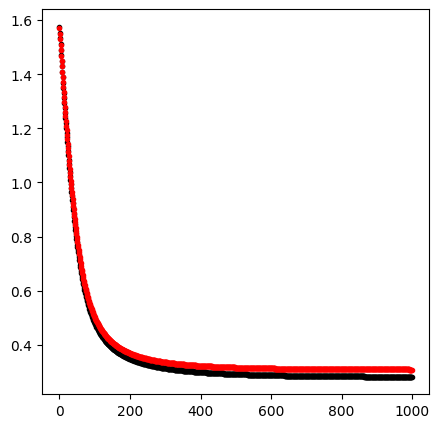

In [50]:
fig = figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.plot(train_loss, "k.")
ax.plot(valid_loss, "r.")